In [159]:
import pandas as pd
import numpy as np

In [160]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")
most_runs = pd.read_csv("most_runs_average_strikerate.csv")
teams = pd.read_csv("teams.csv")
teamwise = pd.read_csv("teamwise_home_and_away.csv")
players = pd.read_excel("Players.xlsx")

In [161]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [162]:
delivery = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [163]:
delivery = delivery[delivery['inning'] == 1]
delivery

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [164]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [165]:
match = matches.merge(delivery[['match_id', 'total_runs']], left_on = 'id', right_on = 'match_id')

In [166]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


Removing the non playing teams

In [167]:
match.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Replace Delhi Daredevils with Delhi Capitals and Deccan Chargers with Sunrisers Hyderabad

In [168]:
replacements = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Gujarat Lions': 'Gujarat Titans',
    'Kings XI Punjab': 'Punjab Kings'
}

for old, new in replacements.items():
    match['team1'] = match['team1'].str.replace(old, new)
    match['team2'] = match['team2'].str.replace(old, new)


In [169]:
match.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Titans',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Punjab Kings',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [170]:
teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Titans',
         'Royal Challengers Bangalore', 'Kolkata Knight Riders', 
         'Delhi Capitals', 'Punjab Kings', 'Chennai Super Kings', 
         'Rajasthan Royals']

match = match[match['team1'].isin(teams) & match['team2'].isin(teams)]
match = match[match.dl_applied == 0]


In [171]:
match = match[['match_id', 'city', 'winner', 'total_runs']]

In [172]:
del_df = match.merge(deliveries, on = 'match_id')

In [173]:
del_df = del_df[del_df.inning == 2]

In [174]:
del_df['Current_runs'] = del_df.groupby('match_id')['total_runs_y'].cumsum()
del_df['Runs_left'] = del_df['total_runs_x'] - del_df['Current_runs'] + 1
del_df['Balls_left'] = 126 - (del_df['over']*6 + del_df['ball'])

del_df['player_dismissed'].replace(np.nan, 0, inplace=True)
del_df['player_dismissed'] = np.where(del_df['player_dismissed'] == 0, del_df['player_dismissed'], 1)
del_df['player_dismissed'] = del_df['player_dismissed'].astype(int)
wickets = del_df.groupby('match_id')['player_dismissed'].cumsum().values
del_df['Wickets_left'] = 10 - wickets

del_df['CRR'] = (del_df.Current_runs*6)/(120-del_df.Balls_left)
del_df['RRR'] = (del_df.Runs_left*6)/del_df.Balls_left
del_df['Result'] = del_df.apply(lambda row: 1 if row['batting_team'] == row['winner'] else 0, axis=1)


C:\Users\aryan\AppData\Local\Temp\ipykernel_14296\2592649979.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  del_df['player_dismissed'].replace(np.nan, 0, inplace=True)


In [175]:
final_df = del_df[['batting_team', 'city', 'bowling_team', 'Runs_left', 'Balls_left', 'Wickets_left', 'total_runs_x', 'CRR', 'RRR', 'Result']]

In [176]:
final_df.isna().sum()

batting_team      0
city            832
bowling_team      0
Runs_left         0
Balls_left        0
Wickets_left      0
total_runs_x      0
CRR               0
RRR               5
Result            0
dtype: int64

In [177]:
final_df.dropna(subset=['city'], inplace=True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_14296\485754450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(subset=['city'], inplace=True)


In [178]:
 final_df.describe()

C:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Runs_left,Balls_left,Wickets_left,total_runs_x,CRR,RRR,Result
count,74508.000000,74508.000000,74508.000000,74508.000000,74508.000000,7.450300e+04,74508.000000
mean,93.293848,62.740041,7.539794,165.893689,7.483982,NaN,0.535687
std,50.203267,33.368753,2.137957,29.269067,2.287357,NaN,0.498728
min,-15.000000,-2.000000,0.000000,65.000000,0.000000,-inf,0.000000
25%,54.000000,35.000000,6.000000,147.000000,6.290031,7.235294e+00,0.000000
50%,93.000000,63.000000,8.000000,165.000000,7.500000,8.963855e+00,1.000000
75%,131.000000,92.000000,9.000000,185.000000,8.750000,1.100000e+01,1.000000
max,250.000000,119.000000,10.000000,250.000000,42.000000,inf,1.000000


In [179]:
ls = ['Runs_left', 'Balls_left', 'RRR']

for i in ls:
    for idx, value in final_df[i].items():
        if value < 0:
            final_df.loc[idx, i] = 0


In [180]:
final_df = final_df[final_df['Balls_left'] != 0]

In [181]:
 final_df.describe()

,Runs_left,Balls_left,Wickets_left,total_runs_x,CRR,RRR,Result
count,74193.000000,74193.000000,74193.000000,74193.000000,74193.000000,74193.000000,74193.000000
mean,93.615907,63.007467,7.559662,165.841683,7.481999,10.636545,0.537396
std,50.046708,33.185598,2.118059,29.272223,2.290599,12.899755,0.498603
min,0.000000,1.000000,0.000000,65.000000,0.000000,0.000000,0.000000
25%,54.000000,35.000000,6.000000,147.000000,6.285714,7.235294,0.000000
50%,93.000000,64.000000,8.000000,165.000000,7.500000,8.957746,1.000000
75%,131.000000,92.000000,9.000000,185.000000,8.750000,10.981132,1.000000
max,250.000000,119.000000,10.000000,250.000000,42.000000,684.000000,1.000000


In [182]:
final_df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Kings XI Punjab', 'Gujarat Lions', 'Rajasthan Royals',
       'Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals'],
      dtype=object)

In [183]:
final_df = final_df.sample(frac=1).reset_index(drop=True)

In [184]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [185]:
final_df['batting_team'] = le.fit_transform(final_df['batting_team'])
final_df['bowling_team'] = le.fit_transform(final_df['bowling_team'])
final_df['city'] = le.fit_transform(final_df['city'])

In [186]:
from sklearn.model_selection import train_test_split
X = final_df.drop(['Result'], axis=1)
y = final_df.Result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [187]:
X_train   

,batting_team,city,bowling_team,Runs_left,Balls_left,Wickets_left,total_runs_x,CRR,RRR
70416,1,22,7,67,38,4,172,7.756098,10.578947
2924,7,10,3,208,118,10,207,0.000000,10.576271
41085,0,8,9,31,60,8,74,4.400000,3.100000
38885,9,20,6,92,79,5,131,5.853659,6.987342
73358,7,22,5,19,3,4,177,8.153846,38.000000
...,...,...,...,...,...,...,...,...,...
66455,0,8,10,151,111,10,159,6.000000,8.162162
46220,3,26,10,18,8,6,163,7.821429,13.500000
48045,3,20,6,54,88,10,97,8.250000,3.681818
70053,7,22,6,125,101,10,155,9.789474,7.425743


In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=100)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', random_state=100, solver='liblinear')

In [190]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7813868859087539


In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.7814
Precision: 0.7895
Recall: 0.8164
F1 Score: 0.8027
ROC AUC Score: 0.8721


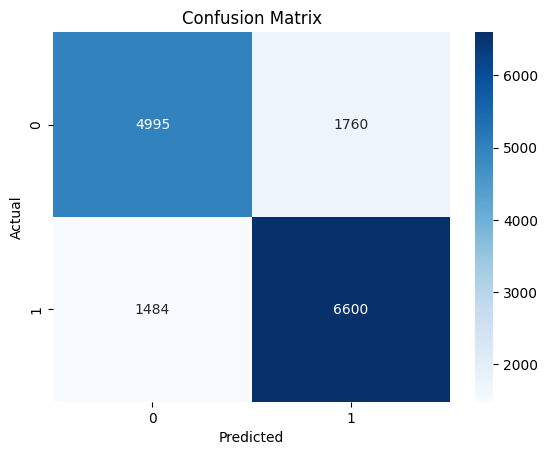

In [193]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

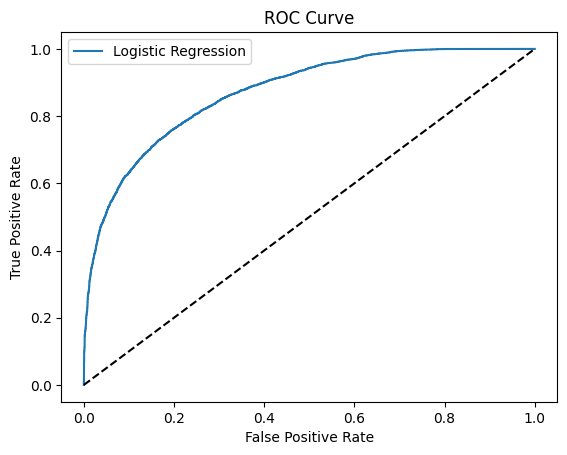

In [194]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [195]:
#final_df.to_csv("cleaned.csv")

In [196]:
import joblib
joblib.dump(model, 'cricket_model1.pkl')
joblib.dump(scaler, 'scaler.pkl1')

['scaler.pkl1']